<a href="https://colab.research.google.com/github/Stesilva16/Eng-de-dados--/blob/main/Pandas_24_11_stefany.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importação

In [ ]:
#instalar o pandera
pip install pandera

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 122 kB 6.9 MB/s 


In [ ]:
#importar o pandera e o pandas
import pandas as pd
import pandera as pa

# Importação do arquivo

In [ ]:
#importar o arquivo para ser estudado e tratado para transforma-lo em uma dataframe
df = pd.read_csv('https://storage.googleapis.com/pandas_26bc/marketing_campaign.csv%20-%20marketing_campaign.csv%20-%20marketing_campaign.csv%20-%20marketing_campaign.csv.csv', sep =',' )

In [ ]:
#Vizualização do dataframe, se o mesmo está correto
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


# Backup 

In [ ]:
#backup do dataframe original, para fazer as modificações e caso algo de errado temos o backup.
dfback = df.copy()

# Pré analise


In [ ]:
#fazer uma analise identificando o que devemos alterar primeiro no nosso dataframe, para poder vizualizar e alterar os nomes das colunas
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Renomear - Colunas

In [ ]:
#Renomear as colunas, ppor que os nomes estão em inglês e ficar algo mais legivel para se ler com maior facilidade
df.rename(columns={'ID':'id','Year_Birth':'ano_nascimento','Education':'educacao','Marital_Status':'estado_civil','Income':'renda_anual_em_dolar','Kidhome':'crianca_em_casa', 'Teenhome':'casa_adolecente'},inplace=True)
df.rename(columns={'Dt_Customer':'cliente_desde','Recency':'atualidade','MntWines':'qtd_vinhos','MntFruits':'qtd_frutas','MntMeatProducts':'qtd_carne','MntFishProducts':'qtd_peixe', 'MntSweetProducts':'qtd_doces', 'MntGoldProds':'qtd_ouro'},inplace=True)
df.rename(columns={'NumDealsPurchases':'compr_com_desc', 'NumWebPurchases':'compr_web','NumCatalogPurchases':'comp_catalog','NumStorePurchases':'compr_loja','NumWebVisitsMonth': 'vistas_web_mes'},inplace=True)
df.rename(columns={'AcceptedCmp3':'camp_3','AcceptedCmp4':'camp_4','AcceptedCmp5':'camp_5','AcceptedCmp1':'camp_1','AcceptedCmp2':'camp_2','Complain':'reclama_2anos', 'Response':'act_ult_camp'},inplace=True)

# Renomear dados da coluna 

In [ ]:
#verificar quais os tipos que existem nas colunas para fazermos a adequação dos nomes para portugues
df.dtypes

id                        int64
ano_nascimento            int64
educacao                 object
estado_civil             object
renda_anual_em_dolar    float64
crianca_em_casa           int64
casa_adolecente           int64
cliente_desde            object
atualidade                int64
qtd_vinhos                int64
qtd_frutas                int64
qtd_carne                 int64
qtd_peixe                 int64
qtd_doces                 int64
qtd_ouro                  int64
compr_com_desc            int64
compr_web                 int64
comp_catalog              int64
compr_loja                int64
vistas_web_mes            int64
camp_3                    int64
camp_4                    int64
camp_5                    int64
camp_1                    int64
camp_2                    int64
reclama_2anos             int64
Z_CostContact             int64
Z_Revenue                 int64
act_ult_camp              int64
dtype: object

# Leitura da Colunas e Dropagem

In [ ]:
#Analise do dados da coluna
pd.unique(df['Z_CostContact'])

array([3])

In [ ]:
#Analise do dados da coluna
pd.unique(df['Z_Revenue'])

array([11])

In [ ]:
#Drop das colunas - 'Z_CostContact','Z_Revenue' - como nas duas colunas estão com todas as linhas com o mesmo dado, é melhor dropar por se tratar do mesmo dado em todas as linhas.
df.drop(['Z_CostContact','Z_Revenue'],axis=1,inplace=True)

#Alterar tipologia da coluna

In [ ]:
#visualização da tipologia dos dados
df.dtypes

id                        int64
ano_nascimento            int64
educacao                 object
estado_civil             object
renda_anual_em_dolar    float64
crianca_em_casa           int64
casa_adolecente           int64
cliente_desde            object
atualidade                int64
qtd_vinhos                int64
qtd_frutas                int64
qtd_carne                 int64
qtd_peixe                 int64
qtd_doces                 int64
qtd_ouro                  int64
compr_com_desc            int64
compr_web                 int64
comp_catalog              int64
compr_loja                int64
vistas_web_mes            int64
camp_3                    int64
camp_4                    int64
camp_5                    int64
camp_1                    int64
camp_2                    int64
reclama_2anos             int64
act_ult_camp              int64
dtype: object

In [ ]:
#como na coluna cliente desde está como objeto, vamos altera-lo para data para que ele fique correto
df['cliente_desde']= pd.to_datetime(df['cliente_desde'])

In [ ]:
#verificação se ficou certo
df.dtypes

id                               int64
ano_nascimento                   int64
educacao                        object
estado_civil                    object
renda_anual_em_dolar           float64
crianca_em_casa                  int64
casa_adolecente                  int64
cliente_desde           datetime64[ns]
atualidade                       int64
qtd_vinhos                       int64
qtd_frutas                       int64
qtd_carne                        int64
qtd_peixe                        int64
qtd_doces                        int64
qtd_ouro                         int64
compr_com_desc                   int64
compr_web                        int64
comp_catalog                     int64
compr_loja                       int64
vistas_web_mes                   int64
camp_3                           int64
camp_4                           int64
camp_5                           int64
camp_1                           int64
camp_2                           int64
reclama_2anos            

In [ ]:
df.head(2)

,id,ano_nascimento,educacao,estado_civil,renda_anual_em_dolar,crianca_em_casa,casa_adolecente,cliente_desde,atualidade,qtd_vinhos,...,comp_catalog,compr_loja,vistas_web_mes,camp_3,camp_4,camp_5,camp_1,camp_2,reclama_2anos,act_ult_camp
0,5524,1957,graduacao,solteiro,58138.0,0,0,2012-04-09,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,graduacao,solteiro,46344.0,1,1,2014-08-03,38,11,...,1,2,5,0,0,0,0,0,0,0


###educação

In [ ]:
#Analise do dados da coluna
pd.unique(df['educacao'])

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [ ]:
#educação
df.replace(['Graduation'],['graduacao'],inplace=True)

In [ ]:
df.replace(['PhD'],['doutorado'],inplace=True)

In [ ]:
df.replace(['Master'],['mestrado'], inplace=True)

In [ ]:
#O 2n cycle é o mesmo que mestrado so que falando que é a mesma ideia
df.replace(['2n Cycle'],['mestrado'], inplace=True)

In [ ]:
df.replace(['Basic'],['basico'], inplace=True)

###estado_civil

In [ ]:
#Analise do dados da coluna
pd.unique(df['estado_civil'])

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [ ]:
df.replace(['Single','YOLO','Absurd','Alone'],['solteiro','solteiro', 'solteiro', 'solteiro'],inplace=True)

In [ ]:
df.replace(['Together','Married', 'Divorced','Widow'],['uniao estavel','casado','divorciado','viuvo'], inplace=True) 

####renda_anual

In [ ]:
sorted(pd.unique(df['renda_anual_em_dolar']))

[1730.0,
 2447.0,
 5648.0,
 7500.0,
 9548.0,
 10245.0,
 10404.0,
 10979.0,
 12571.0,
 14045.0,
 14515.0,
 14849.0,
 15033.0,
 15287.0,
 15345.0,
 16248.0,
 16626.0,
 17323.0,
 18100.0,
 18492.0,
 18589.0,
 18701.0,
 18890.0,
 19510.0,
 19789.0,
 19986.0,
 20130.0,
 20518.0,
 20559.0,
 21918.0,
 21994.0,
 22010.0,
 22070.0,
 22212.0,
 22574.0,
 22585.0,
 22804.0,
 23228.0,
 23295.0,
 23442.0,
 23559.0,
 23616.0,
 23626.0,
 23661.0,
 23718.0,
 23957.0,
 23976.0,
 24027.0,
 24072.0,
 24279.0,
 24480.0,
 24594.0,
 24882.0,
 25271.0,
 25545.0,
 25721.0,
 26091.0,
 26095.0,
 26304.0,
 26326.0,
 26490.0,
 26646.0,
 27038.0,
 27190.0,
 27203.0,
 27213.0,
 27255.0,
 27421.0,
 27938.0,
 28249.0,
 28332.0,
 28442.0,
 28457.0,
 28691.0,
 28718.0,
 28839.0,
 29315.0,
 29440.0,
 29548.0,
 29604.0,
 29672.0,
 29760.0,
 29938.0,
 29999.0,
 30015.0,
 30096.0,
 30279.0,
 30351.0,
 30372.0,
 30477.0,
 30507.0,
 30523.0,
 30630.0,
 30631.0,
 30675.0,
 30732.0,
 30753.0,
 30822.0,
 30833.0,
 30899.0,
 3099

In [ ]:
 #Escolhi na por que na, por que são valores não aplicaveis
 df.replace([' ','nan'],pd.NA, inplace=True)

In [ ]:
pd.unique(df['renda_anual_em_dolar'])

array([58138., 46344., 71613., ..., 56981., 69245., 52869.])

In [ ]:
df.isna().sum()

id                       0
ano_nascimento           0
educacao                 0
estado_civil             0
renda_anual_em_dolar    24
crianca_em_casa          0
casa_adolecente          0
cliente_desde            0
atualidade               0
qtd_vinhos               0
qtd_frutas               0
qtd_carne                0
qtd_peixe                0
qtd_doces                0
qtd_ouro                 0
compr_com_desc           0
compr_web                0
comp_catalog             0
compr_loja               0
vistas_web_mes           0
camp_3                   0
camp_4                   0
camp_5                   0
camp_1                   0
camp_2                   0
reclama_2anos            0
act_ult_camp             0
dtype: int64

# Filtros


In [ ]:
#Analisar a quantidade de dados em cada coluna 
df.count()

id                      2240
ano_nascimento          2240
educacao                2240
estado_civil            2240
renda_anual_em_dolar    2216
crianca_em_casa         2240
casa_adolecente         2240
cliente_desde           2240
atualidade              2240
qtd_vinhos              2240
qtd_frutas              2240
qtd_carne               2240
qtd_peixe               2240
qtd_doces               2240
qtd_ouro                2240
compr_com_desc          2240
compr_web               2240
comp_catalog            2240
compr_loja              2240
vistas_web_mes          2240
camp_3                  2240
camp_4                  2240
camp_5                  2240
camp_1                  2240
camp_2                  2240
reclama_2anos           2240
act_ult_camp            2240
dtype: int64

In [ ]:
#Dado inscontatnte - uma pessoa em  - 1893 - ftano_nasc = df.ano_nascimento == 1893
#Dado inscontatnte - uma pessoa em  - 1899 - ftano_nasc = df.ano_nascimento == 1899
#Dado inscontatnte - uma pessoa em  - 1900 - ftano_nasc = df.ano_nascimento == 1900
#verificação dos dados insconsistentes
ftano_nasc = df.ano_nascimento == 1940
dfano_nasc = df.loc[ftano_nasc]
dfano_nasc

,id,ano_nascimento,educacao,estado_civil,renda_anual_em_dolar,crianca_em_casa,casa_adolecente,cliente_desde,atualidade,qtd_vinhos,...,comp_catalog,compr_loja,vistas_web_mes,camp_3,camp_4,camp_5,camp_1,camp_2,reclama_2anos,act_ult_camp
1950,6663,1940,doutorado,solteiro,51141.0,0,0,2013-08-07,96,144,...,1,4,5,0,0,0,0,0,0,0


# Validação de dados

In [ ]:
#Verifcação dos dados antes de validação
df.dtypes

id                               int64
ano_nascimento                   int64
educacao                        object
estado_civil                    object
renda_anual_em_dolar           float64
crianca_em_casa                  int64
casa_adolecente                  int64
cliente_desde           datetime64[ns]
atualidade                       int64
qtd_vinhos                       int64
qtd_frutas                       int64
qtd_carne                        int64
qtd_peixe                        int64
qtd_doces                        int64
qtd_ouro                         int64
compr_com_desc                   int64
compr_web                        int64
comp_catalog                     int64
compr_loja                       int64
vistas_web_mes                   int64
camp_3                           int64
camp_4                           int64
camp_5                           int64
camp_1                           int64
camp_2                           int64
reclama_2anos            

In [ ]:
# Criação do schema de validação dos dados
schema = pa.DataFrameSchema(
      columns = {
          'id':pa.Column(pa.Int),
          'ano_nascimento':pa.Column(pa.Int),
          'educacao': pa.Column(pa.String),                 
          'estado_civil':pa.Column(pa.String),         
          'renda_anual_em_dolar' :pa.Column(pa.Float),  
          'crianca_em_casa': pa.Column(pa.Int),          
          'casa_adolecente': pa.Column(pa.Int),        
          'cliente_desde':pa.Column(pa.DateTime),              
          'atualidade':pa.Column(pa.Int),              
          'qtd_vinhos':pa.Column(pa.Int),               
          'qtd_frutas':pa.Column(pa.Int),                
          'qtd_carne':pa.Column(pa.Int),                
          'qtd_peixe':pa.Column(pa.Int),                
          'qtd_doces':pa.Column(pa.Int),                 
          'qtd_ouro':pa.Column(pa.Int),                
          'compr_com_desc':pa.Column(pa.Int),           
          'compr_web':pa.Column(pa.Int),                
          'comp_catalog':pa.Column(pa.Int),              
          'compr_loja':pa.Column(pa.Int),
          'vistas_web_mes':pa.Column(pa.Int),            
          'camp_3':pa.Column(pa.Int),                
          'camp_4':pa.Column(pa.Int),                   
          'camp_5':pa.Column(pa.Int),                   
          'camp_1':pa.Column(pa.Int),                    
          'camp_2':pa.Column(pa.Int),                    
          'reclama_2anos':pa.Column(pa.Int),             
          'act_ult_camp':pa.Column(pa.Int), 
          }
  )      

#GROUP BY

In [ ]:
#Agrupamentos dos grupos para verificar quantos clientes estão conosco, ver as datas
df.groupby(['cliente_desde']).size().sort_values(ascending=False)

cliente_desde
2012-08-31    12
2014-12-05    11
2013-02-14    11
2012-12-09    11
2014-05-22    10
              ..
2013-05-03     1
2013-05-13     1
2013-05-14     1
2013-05-16     1
2014-12-06     1
Length: 663, dtype: int64

In [ ]:
#Agrupamentos dos grupos para verificar qual é a idade desses clientes
df.groupby(['ano_nascimento']).size().sort_values(ascending=False)

ano_nascimento
1976    89
1971    87
1975    83
1972    79
1970    77
1978    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1977    52
1952    52
1959    51
1968    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1962    44
1967    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1949    30
1989    30
1950    29
1988    29
1987    27
1948    21
1990    18
1947    16
1946    16
1991    15
1992    13
1945     8
1944     7
1943     7
1995     5
1993     5
1994     3
1996     2
1899     1
1941     1
1940     1
1900     1
1893     1
dtype: int64

# carregamento

In [ ]:
#carregamento dos dados tratados
df.to_csv('dadostratados_campanha_mkt.csv',index=False)

# Estudos de dados!
#Quantas pessoas graduadas recebem mais de 50k por ano, qual é o ano que elas nasceram. 

In [ ]:
#criação de um novo data frame para a verificação dos dados especificos a serem estudados
df_grad = df[['id','ano_nascimento','educacao','estado_civil','renda_anual_em_dolar','cliente_desde','atualidade','qtd_vinhos','reclama_2anos']]
df_grad.groupby(['renda_anual_em_dolar']).size().sort_values(ascending=False)

renda_anual_em_dolar
7500.0      12
35860.0      4
18929.0      3
18690.0      3
37760.0      3
            ..
42081.0      1
42033.0      1
42021.0      1
42011.0      1
666666.0     1
Length: 1974, dtype: int64

In [ ]:
#Filto dos graduados que recebem acima de 50k por ano
ftgrad = df.educacao == 'graduacao'
ftrenda = (df.renda_anual_em_dolar > 50000)
df_grad = df.loc[ftgrad & ftrenda]
df_grad

,id,ano_nascimento,educacao,estado_civil,renda_anual_em_dolar,crianca_em_casa,casa_adolecente,cliente_desde,atualidade,qtd_vinhos,...,comp_catalog,compr_loja,vistas_web_mes,camp_3,camp_4,camp_5,camp_1,camp_2,reclama_2anos,act_ult_camp
0,5524,1957,graduacao,solteiro,58138.0,0,0,2012-04-09,58,635,...,10,4,7,0,0,0,0,0,0,1
2,4141,1965,graduacao,uniao estavel,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
6,965,1971,graduacao,divorciado,55635.0,0,1,2012-11-13,34,235,...,3,7,6,0,0,0,0,0,0,0
12,2125,1959,graduacao,divorciado,63033.0,0,0,2013-11-15,82,194,...,4,8,2,0,0,0,0,0,0,0
26,2404,1976,graduacao,casado,53359.0,1,1,2013-05-27,4,173,...,1,4,7,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226,4478,1979,graduacao,casado,63777.0,1,1,2013-03-24,87,457,...,1,6,8,0,0,0,0,0,0,0
2227,4201,1962,graduacao,solteiro,57967.0,0,1,2013-03-03,39,229,...,2,8,5,0,0,0,0,0,0,0
2233,9432,1977,graduacao,uniao estavel,666666.0,1,0,2013-02-06,23,9,...,1,3,6,0,0,0,0,0,0,0
2235,10870,1967,graduacao,casado,61223.0,0,1,2013-06-13,46,709,...,3,4,5,0,0,0,0,0,0,0


In [ ]:
#Elevantamento para ver quais são os anos que os clientes graduados nasceram
pd.unique(df_grad['ano_nascimento'])

array([1957, 1965, 1971, 1959, 1976, 1980, 1977, 1978, 1966, 1975, 1952,
       1948, 1958, 1970, 1987, 1973, 1967, 1972, 1979, 1969, 1991, 1962,
       1983, 1984, 1949, 1955, 1953, 1988, 1954, 1968, 1985, 1990, 1974,
       1963, 1956, 1982, 1947, 1960, 1986, 1993, 1994, 1981, 1989, 1964,
       1951, 1944, 1995, 1961, 1992, 1950, 1945, 1946])

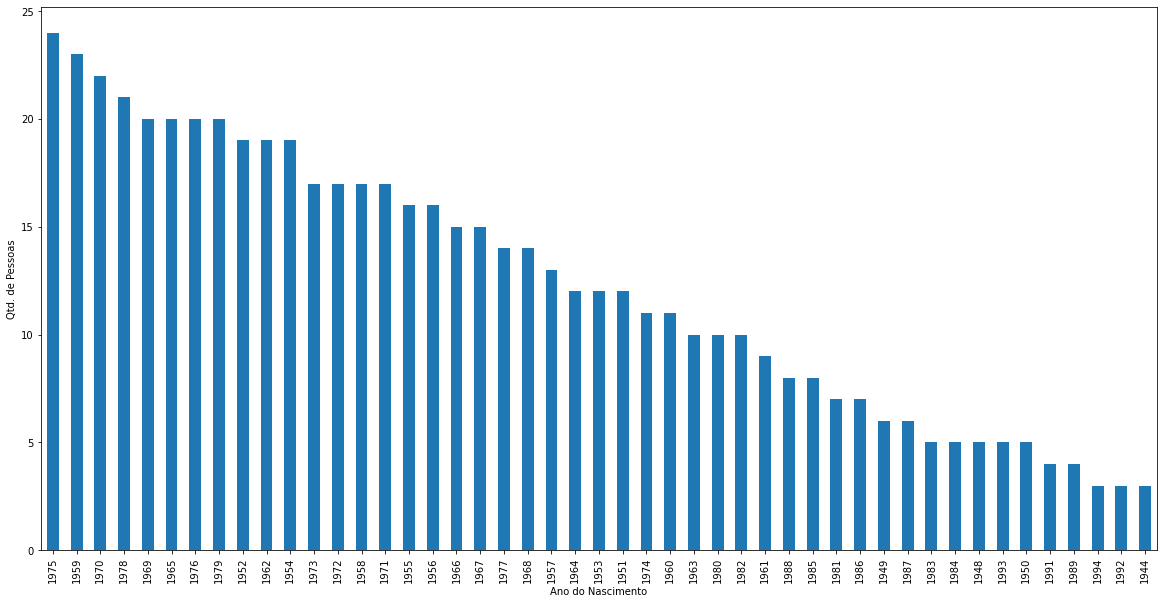

In [ ]:
#Plotagem grárfico de barra, grafico para a verificação 
df_grad.groupby(['ano_nascimento'],dropna=False).size().sort_values(ascending=False).head(47).plot.bar(figsize=(20,10),xlabel='Ano do Nascimento',ylabel='Qtd. de Pessoas')

In [ ]:
#load do filtro ultizado para ver quantos graduados com renda superior a renda anual
df_grad.to_csv('dadostratados_gradu.csv',index=False)

In [ ]:
#leitura do grafico para ver se está okay
df_grad

,id,ano_nascimento,educacao,estado_civil,renda_anual_em_dolar,crianca_em_casa,casa_adolecente,cliente_desde,atualidade,qtd_vinhos,...,comp_catalog,compr_loja,vistas_web_mes,camp_3,camp_4,camp_5,camp_1,camp_2,reclama_2anos,act_ult_camp
0,5524,1957,graduacao,solteiro,58138.0,0,0,2012-04-09,58,635,...,10,4,7,0,0,0,0,0,0,1
2,4141,1965,graduacao,uniao estavel,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
6,965,1971,graduacao,divorciado,55635.0,0,1,2012-11-13,34,235,...,3,7,6,0,0,0,0,0,0,0
12,2125,1959,graduacao,divorciado,63033.0,0,0,2013-11-15,82,194,...,4,8,2,0,0,0,0,0,0,0
26,2404,1976,graduacao,casado,53359.0,1,1,2013-05-27,4,173,...,1,4,7,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226,4478,1979,graduacao,casado,63777.0,1,1,2013-03-24,87,457,...,1,6,8,0,0,0,0,0,0,0
2227,4201,1962,graduacao,solteiro,57967.0,0,1,2013-03-03,39,229,...,2,8,5,0,0,0,0,0,0,0
2233,9432,1977,graduacao,uniao estavel,666666.0,1,0,2013-02-06,23,9,...,1,3,6,0,0,0,0,0,0,0
2235,10870,1967,graduacao,casado,61223.0,0,1,2013-06-13,46,709,...,3,4,5,0,0,0,0,0,0,0


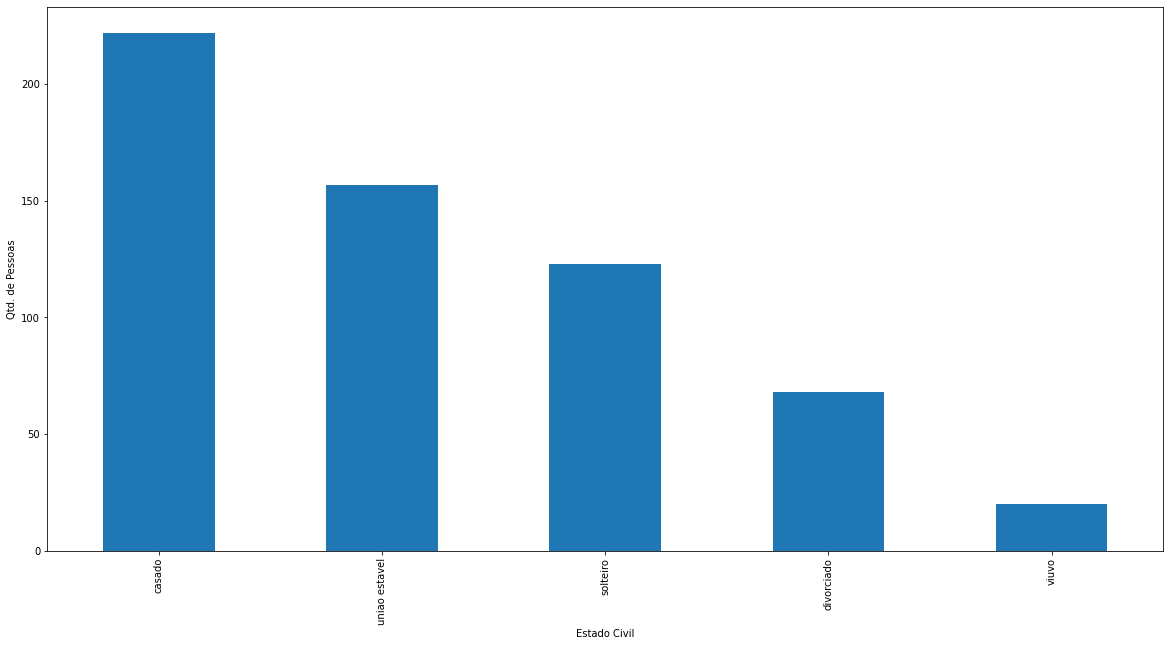

In [ ]:
#Filto dos graduados que recebem acima de 50k por ano e qual a situação civil
ftgrad = df.educacao == 'graduacao'
ftrenda = (df.renda_anual_em_dolar > 50000)
df_renda = df.loc[ftgrad & ftrenda]
df_renda
df_renda.groupby(['estado_civil'],dropna=False).size().sort_values(ascending=False).head(47).plot.bar(figsize=(20,10),xlabel='Estado Civil',ylabel='Qtd. de Pessoas')

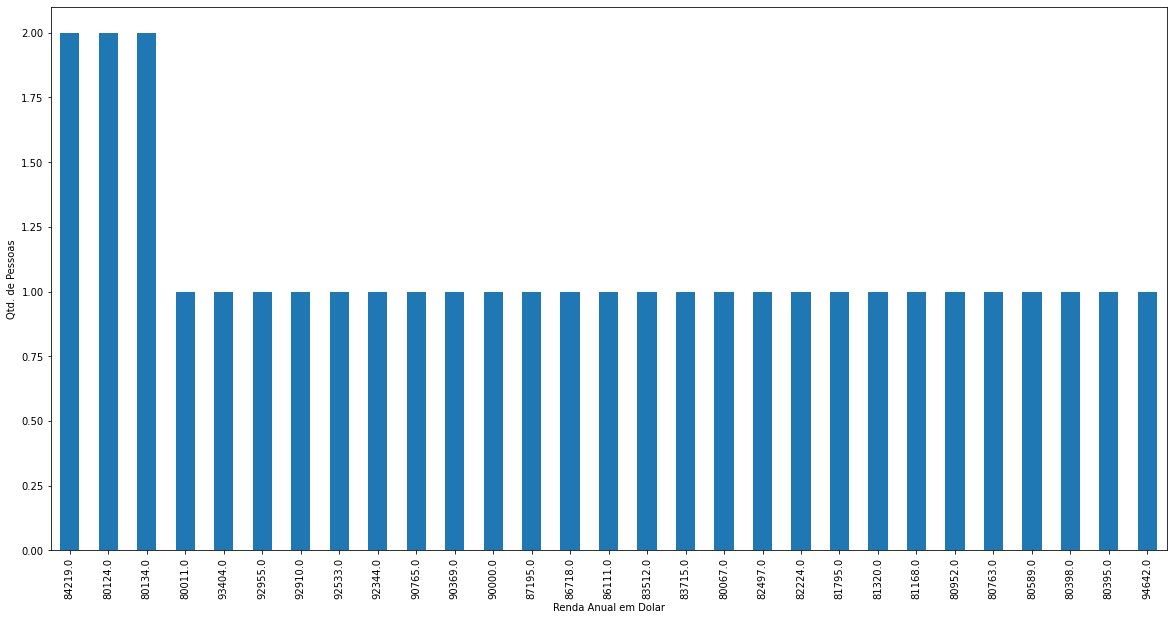

In [ ]:
#Filto dos graduados, renda maior que 80k por ano, casados
ftgrad = df.educacao == 'graduacao'
ftrenda = (df.renda_anual_em_dolar > 80000)
fttest_civil = df.estado_civil == 'casado'
df_cas = df.loc[ftgrad & ftrenda & fttest_civil]
df_cas
df_cas.groupby(['renda_anual_em_dolar'],dropna=False).size().sort_values(ascending=False).head(47).plot.bar(figsize=(20,10),xlabel='Renda Anual em Dolar',ylabel='Qtd. de Pessoas')



In [ ]:
# Carregamentos dos dois novos dataframe
#estado civil dos gruados que recebem acima de 50k
df_renda.to_csv('dadostratados_est_civil_50.csv',index=False)

#Casados/graduados/renda maior que 80k
df_cas.to_csv('dadostratados_cas_renda_80.csv',index=False)